# Ejercicio de Clasificación de Hojas
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [2]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Colab Notebooks/Datos/'
FUENTES_DIR = DRIVE_DIR + 'Colab Notebooks/Fuentes'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos

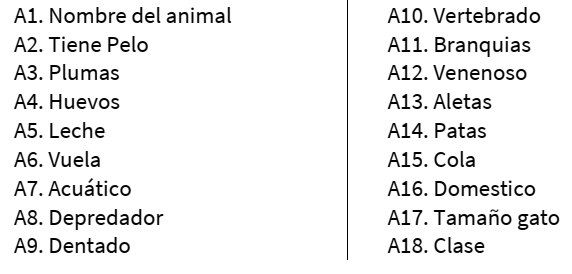

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassPerceptron import Perceptron

nombre_archivo = DATOS_DIR + 'zoo.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza
print(df)

# recupera todas las columnas salvo primera (animal) y última (clase)
X = np.array( df.iloc[:,1:-1] )
T_raw = np.array( df.iloc[:,-1])

             animal  Tiene_Pelo  Tiene_Plumas  Nace_de_huevo  Toma_Leche  \
0    oso_hormiguero           1             0              0           1   
1          antilope           1             0              0           1   
2            robalo           0             0              1           0   
3               oso           1             0              0           1   
4            jabali           1             0              0           1   
..              ...         ...           ...            ...         ...   
96          canguro           1             0              0           1   
97           avispa           1             0              1           0   
98             lobo           1             0              0           1   
99           gusano           0             0              1           0   
100      troglodito           0             1              1           0   

     Vuela  Acuatico  Depredador  Dentado  Vertebrado  Respira  Venenoso  \
0        0 

---
Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima
cantidad de iteraciones MAX_ITE=300.

In [4]:
#CLASE = "Mamifero"
CLASE = "Ave"

MAX_ITE = 200
ALFA = 0.01

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

modelo.fit(X, T)      # entrena

Y = modelo.predict(X) # Prediccion

# Resultados - Accuracy
efectividad = 100.0*np.sum(Y==T)/len(Y)

iter = len(modelo.errors_)

print("\nClase %s con %6.2f%% de efectividad en %d iteraciones" % (CLASE, efectividad, iter))


Clase Ave con 100.00% de efectividad en 23 iteraciones


---
Observe los pesos del perceptrón entrenado en el punto anterior ¿Puede determinar cuáles son las características más utilizadas para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y observe si las características más utilizadas siguen siendo las mismas

In [5]:
#CLASE = "Mamifero"
#CLASE = "Ave"
CLASE = "Mamifero"

MAX_ITE = 200
ALFA = 0.005

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

modelo.fit(X, T)      # entrena

Y = modelo.predict(X) # Prediccion

# Resultados - Accuracy
efectividad = 100.0*np.sum(Y==T)/len(Y)

iter = len(modelo.errors_)

print("\nClase %s con %6.2f%% de efectividad en %d iteraciones" % (CLASE, efectividad, iter))


# obtiene los índices de W, ordenados por su contenido de menor a mayor
W = modelo.w_
idx=np.argsort(np.abs(W))

# invierte el indice: de mayor a menor
idx =idx[::-1]

#ordena los atributos. De la columna 1 a la anteúltima reordena según
atributos_ordenados =  df.columns[1:-1][idx]
pesos_ordenados = W[idx]

resultado = np.array([atributos_ordenados, pesos_ordenados]).transpose()

print(resultado)
print(modelo.b_)


Clase Mamifero con 100.00% de efectividad en 33 iteraciones
[['Toma_Leche' 0.6017205619749455]
 ['Nace_de_huevo' -0.545844049578263]
 ['Vuela' -0.4440211097953244]
 ['Domestico' -0.409765024696521]
 ['Respira' 0.36634198320760747]
 ['Tiene_Aletas' 0.291120406023064]
 ['Acuatico' -0.28533176629187484]
 ['Depredador' -0.2786425886250635]
 ['Dentado' -0.24374713610941967]
 ['Tiene_Pelo' 0.1774106928517701]
 ['Tamano_Gato' 0.11768099047752067]
 ['Tiene_Plumas' 0.11561541693421906]
 ['Vertebrado' -0.08732029601658509]
 ['Venenoso' -0.08395289943988266]
 ['Cant_Patas' -0.03915652646698201]
 ['Tiene_Cola' 0.009701638449429343]]
0.08560246317476727


---
# Experimentando...

Investigar cuantos atributos son necesarios para identificar la especie

Atributos seleccionados para Mamifero:
 [['Toma_Leche' 0.40385420857107596 '+']
 ['Nace_de_huevo' 0.37195125618307623 '-']]

El perceptrón clasifica como Mamifero con 100.00% de efectividad en 2 iteraciones usando 2 atributos


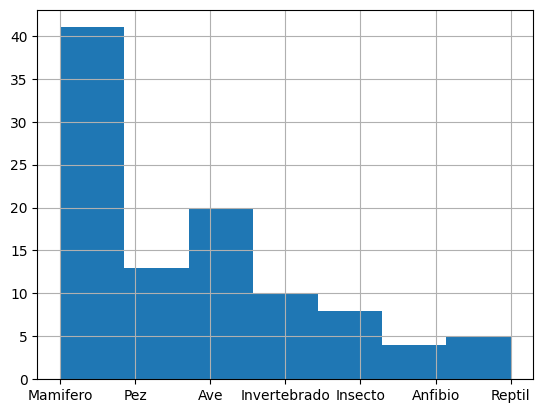

In [6]:
# Clases en el dataset
CLASES = ["Mamifero", "Pez", "Ave", "Invertebrado", "Insecto", "Anfibio", "Reptil"]

# Seleccion de clase a clasificar: una contra el resto, Mamifero = 0
CLASE_ID = 0

# Nombre de la clase seleccionada
CLASE = CLASES[CLASE_ID]

#cantidad de atributos mas importantes a tomar
CAN_ATRIB = 2
MAX_ITE = 200
ALFA = 0.02

REPETICIONES = 150

df['Clase'].hist(bins=len(CLASES))

X = np.array( df.iloc[:,1:-1] )
T_raw = np.array( df.iloc[:,-1])

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# para acumular pesos
W_acc = np.zeros(X.shape[1])
for i in range(0,REPETICIONES):
    # entrena al perceptron
    # crea perceptrón con parámetros indicados
    modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

    modelo.fit(X, T)      # entrena

    # acumula los pesos. pesos positivos => mas positivos, pesos negativos => menos negativos
    W_acc+= np.abs(modelo.w_)
    #W_acc+= modelo.w_

# Para reflexionar:
# cada atributo de una muestra puede valer 1 o 0, es decir está presente o no está presente
# Para el perceptron, valores de peso mayores a 0 indican que el atributo asociado a dicho peso es relevante

# Promedia pesos
W_acc = W_acc/ REPETICIONES

# obtiene los índices de W, ordenados por su contenido de menor a mayor
idx=np.argsort(np.abs(W_acc))
# invierte el indice: de mayor a menor
idx = idx[::-1]

# selecciona los 3 de mayor peso promedio
idx =idx[0:CAN_ATRIB]

# deja solo los indices de los pesos positivos con cierto margen
idx = idx[np.abs(W_acc[idx]) > 0.08]

#ordena los atributos. De la columna 1 a la anteúltima reordena según
atributos_ordenados =  df.columns[1:-1][idx]
pesos_ordenados = W_acc[idx]
pesos_ordenados_signo = np.where(modelo.w_[idx] >= 0, '+', '-')

# arma una estructura de atributos + pesos seleccionados, ordenados por valor accumulado descendiente
resultado = np.array([atributos_ordenados, pesos_ordenados, pesos_ordenados_signo]).transpose()

print("Atributos seleccionados para %s:\n" % CLASE, resultado)


############################################################
# Entrenamiento con los atributos mas significativos para la clase seleccionada

df_red = df.loc[:,atributos_ordenados]

X = np.array( df_red )
T_raw = np.array( df.iloc[:,-1])

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# Entrena el perceptrón con los atributos
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)
modelo.fit(X, T)      # entrena

iter = len(modelo.errors_)  # iteraciones
Y = modelo.predict(X)       # Prediccion

# calcular efectividad comparando T con Y
efectividad = 100*np.sum(T==Y) / len(Y)
print("\nEl perceptrón clasifica como ""%s"" con %6.2f%% de efectividad en %d iteraciones usando %d atributos" % (CLASE, efectividad, iter, len(atributos_ordenados)))